In [206]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

In [88]:
import decimal
from decimal import Decimal
decimal.getcontext().prec = 3

In [174]:
path = "size_9_games/v1/2005-2007.csv"
# path = "size_9_games/v1/2006/2006-features.csv"
data = np.loadtxt(path, skiprows=1, delimiter=',')

In [175]:
# data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [176]:
rows, cols = np.shape(data)
n_targets = 82
np.shape(data)

(930609, 323)

In [177]:

X = data[:,0:cols-n_targets]
y = data[:,cols-n_targets:]

In [178]:
np.shape(X)

(930609, 241)

In [179]:
np.shape(y)

(930609, 82)

In [180]:
X_traintest, X_cv, y_traintest, y_cv = train_test_split(X, y, test_size=0.2) #20% for cross validation
X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest, test_size=0.25) #60% for train and 20% for test because 0.8 * 0.25 = 0.2

In [181]:
np.shape(X_train)

(558365, 241)

In [182]:
np.shape(X_test)

(186122, 241)

In [191]:
# NOTE: with 1 million data points in X_train, on a 1 hidden layer 100 node NN, with early_stopping = true, this took between 3-5 minutes.
# With 500k datapoints on a 300 x 2 hidden layer NN, with early stopping, this took less than 5 minutes:
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(300,2), early_stopping=True).fit(X_train, y_train)

In [192]:
clf.score(X_test, y_test)

0.0

In [200]:
probs = clf.predict_proba(X_test)
predicts = clf.predict(X_test)
test_rows, test_cols = np.shape(predicts)

In [201]:
np.shape(predicts)

(186122, 82)

In [195]:
top5 = 0
top3 = 0
top1 = 0
for i, row in enumerate(probs):
    # print(np.shape(row))
    
    ind = np.argpartition(row, -5)[-5:]
    y_target = np.argmax(y_test[i])
    
    if y_target == ind[-1]:
        top1 += 1
        top3 += 1
        top5 += 1
        continue
    # print(ind[2:])
    
    if y_target in ind[2:]:
        top3 += 1
        top5 += 1
        continue

    if y_target in ind[0:2]:
        top5 += 1
    
    # print(y_targ)
    # print(ind)
    
    # print(row)
    # print(maxes)
    # print(row[ind])
    # if i > 0: 
    #     break


In [196]:
def get_tops(probabilities,testset):
    top5 = 0
    top3 = 0
    top1 = 0
    for i, row in enumerate(probabilities):
        # print(i)
        
        ind = np.argpartition(row, -5)[-5:]
        # print(ind)
        y_target = np.argmax(testset[i])
        
        if y_target == ind[-1]:
            top1 += 1
            top3 += 1
            top5 += 1
            continue
        
        if y_target in ind[2:]:
            top3 += 1
            top5 += 1
            continue
    
        if y_target in ind[0:2]:
            top5 += 1
    # print(top5)
    return (top1, top3, top5)



In [197]:
print(f"top 5: {top5} {Decimal(top5)/Decimal(test_rows)}")
print(f"top 3: {top3} {Decimal(top3)/Decimal(test_rows)}")
print(f"top 1: {top1} {Decimal(top1)/Decimal(test_rows)}")
t1, t3, t5 = get_tops(probs, y_test)
print(f"top 5: {t5} {Decimal(t5)/Decimal(test_rows)}")
print(f"top 3: {t3} {Decimal(t3)/Decimal(test_rows)}")
print(f"top 1: {t1} {Decimal(t1)/Decimal(test_rows)}")

top 5: 18259 0.0981
top 3: 11740 0.0631
top 1: 4150 0.0223
top 5: 18259 0.0981
top 3: 11740 0.0631
top 1: 4150 0.0223


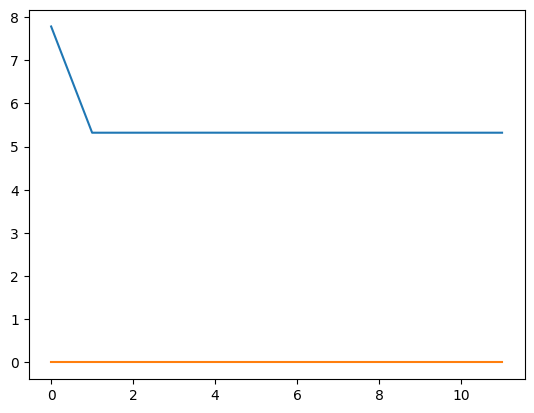

In [198]:
plt.plot(clf.loss_curve_)
plt.plot(clf.validation_scores_)

In [203]:
# alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
# cur_max_top_1 = 0
# top_model = None
# top_alpha = 0
# for alpha in alphas:
#     mlp = MLPClassifier(random_state=1,early_stopping=False, alpha=alpha).fit(X_train, y_train)
#     probabilities = mlp.predict_proba(X_test)
    
#     top1, top3, top5 = get_tops(probabilities, y_test)
#     print(top1)
    
#     if top1 > cur_max_top_1:
#         cur_max_top_1 = top1
#         top_model = mlp
#         top_alpha = alpha
# plt.plot(mlp.loss_curve_)
# plt.plot(mlp.validation_scores_)      

In [208]:
predictions = clf.predict(X_cv)    
cm = multilabel_confusion_matrix(y_cv, predictions)
# print(top_alpha)



In [212]:
np.shape(cm[0])

(2, 2)

In [213]:
tn, fp, fn, tp = cm[0].ravel()

In [214]:
tn

185523

In [215]:
tp

0

In [216]:
fp

0

In [217]:
fn

599